# Name : Sandeep Patel 

Task : from the given 'iris' dataset predict the optimum number of clusters and represent it visually 

## Import libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib .pyplot as plt
import seaborn as sns
from sklearn import datasets

## loading dataset 

In [2]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data,columns = iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
iris_df.shape

(150, 4)

In [4]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [5]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Exploratory Data Analysis

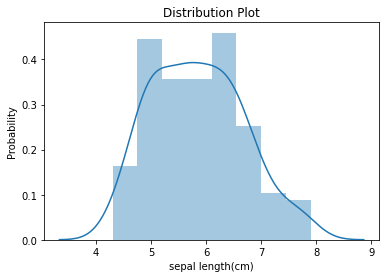

In [6]:
sns.distplot(iris_df['sepal length (cm)'])
plt.xlabel('sepal length(cm)')
plt.ylabel('Probability')
plt.title('Distribution Plot')
plt.show()

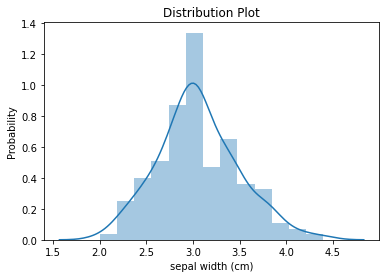

In [7]:
sns.distplot(iris_df['sepal width (cm)'])
plt.xlabel('sepal width (cm)')
plt.ylabel('Probability')
plt.title('Distribution Plot')
plt.show()

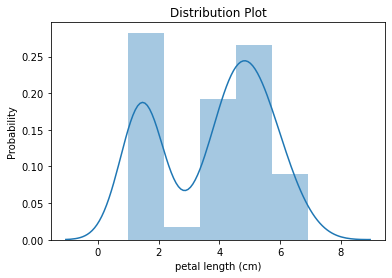

In [8]:
sns.distplot(iris_df['petal length (cm)'])
plt.xlabel('petal length (cm)')
plt.ylabel('Probability')
plt.title('Distribution Plot')
plt.show()

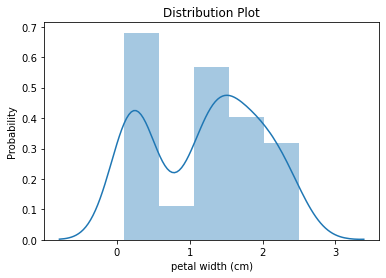

In [9]:
sns.distplot(iris_df['petal width (cm)'])
plt.xlabel('petal width (cm)')
plt.ylabel('Probability')
plt.title('Distribution Plot')
plt.show()

## Now doing Multivariate Analysis

In [10]:
iris_df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


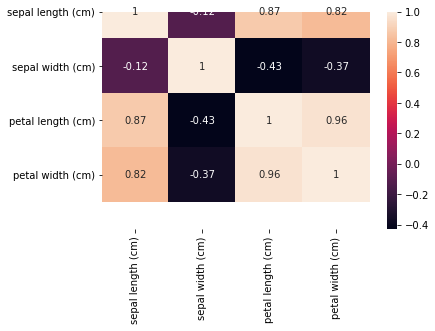

In [12]:
#using heatmap
axis = sns.heatmap(iris_df.corr(),annot=True)
bottom,top = axis.get_ylim()
axis.set_ylim(bottom+0.5,top+0.5)
plt.show()

Here we can see that there is positive correlation between
sepal length and petal length,sepal length and petal width,and petal length and petal width

here also we can see that there is negative correlation between sepal width and petal length,sepal width and petal width,and sepal length and sepal width

## Now using a pairplot

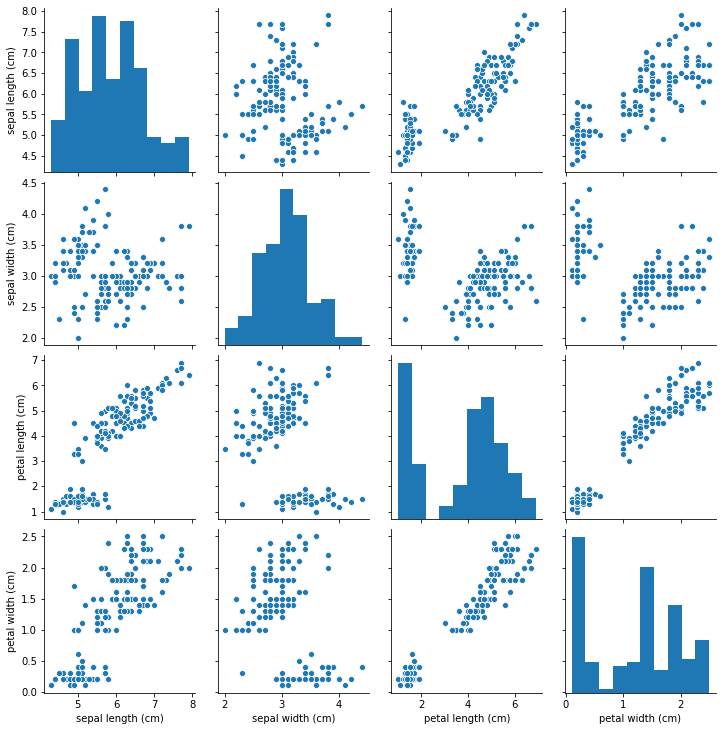

In [13]:
sns.pairplot(iris_df)
plt.show()

from the pairplot we can see that there is atleast two clusters

Now finding the optimum no. of cluster for K-Means Algorithm 

In [14]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [15]:
x = iris_df.iloc[:,[0,1,2,3]].values
from sklearn.cluster import KMeans
with_in_cluster_sum_square = []
for i in range(1,11):
    Kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    Kmeans.fit(x)
    with_in_cluster_sum_square.append(Kmeans.inertia_)

Now Plotting Result to observe the Elbow

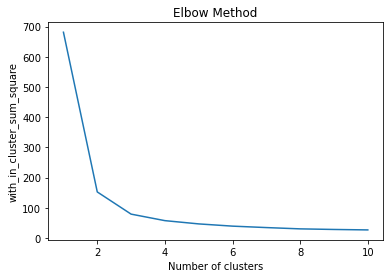

In [17]:
plt.plot(range(1,11),with_in_cluster_sum_square )
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('with_in_cluster_sum_square')
plt.show()

Apllying Kmeans to the Dataset

In [18]:
Kmeans = KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_Kmeans = Kmeans.fit_predict(x)

Now visualizing  the cluster

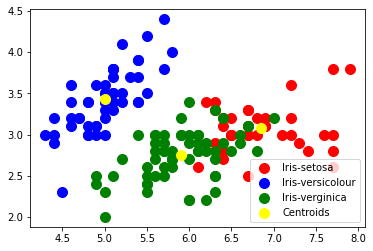

In [19]:
plt.scatter(x[y_Kmeans==0,0],x[y_Kmeans==0,1],s=100,c='red',label='Iris-setosa')
plt.scatter(x[y_Kmeans==1,0],x[y_Kmeans==1,1],s=100,c='blue',label='Iris-versicolour')
plt.scatter(x[y_Kmeans==2,0],x[y_Kmeans==2,1],s=100,c='green',label='Iris-verginica')
#plotting centroid of cluster
plt.scatter(Kmeans.cluster_centers_[:,0],Kmeans.cluster_centers_[:,1],s=100,c='yellow',label='Centroids')
plt.legend()


## Thankyou